In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [143]:
filename='./data/macdonald.csv'
df=pd.read_csv(filename,sep=',')

In [145]:
df.head(30)

,Menu Category,Menu Items,gOrml,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,g,168.0,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,g,146.0,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,g,199.0,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,g,250.0,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,g,177.0,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24
5,Regular Menu,Veg Maharaja Mac,g,306.0,832.67,24.17,37.94,16.83,0.28,36.19,93.84,11.52,6.92,1529.22
6,Regular Menu,Green Chilli Aloo Naan,g,132.0,356.09,7.91,15.08,6.11,0.24,9.45,46.36,4.53,1.15,579.60
7,Regular Menu,Pizza Puff,g,87.0,228.21,5.45,11.44,5.72,0.09,5.17,24.79,2.73,0.35,390.74
8,Regular Menu,Mc chicken Burger,g,173.0,400.80,15.66,15.70,5.47,0.16,31.17,47.98,5.53,4.49,766.33
9,Regular Menu,FILLET-O-FISH Burger,g,136.0,348.11,15.44,14.16,5.79,0.21,32.83,38.85,5.58,3.54,530.54


In [107]:
MenuCat=df[['Menu Category','Menu Items','gOrml']].values

In [108]:
dataX=df.drop(['Menu Category','Menu Items','gOrml'],axis=1)
m,n=dataX.shape
DataXperWeight=dataX.iloc[:,0:n].div(dataX['Per Serve Size'],axis=0)
#print(NormDataX.head())
X=DataXperWeight.values
print("Shape of X is ", X.shape)

Shape of X is  (141, 11)


In [109]:
scaler=StandardScaler()
scaler.fit(X)
Xstd=scaler.transform(X)
#print(Xstd)

In [110]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(Xstd)
Xstd=imp.transform(Xstd)

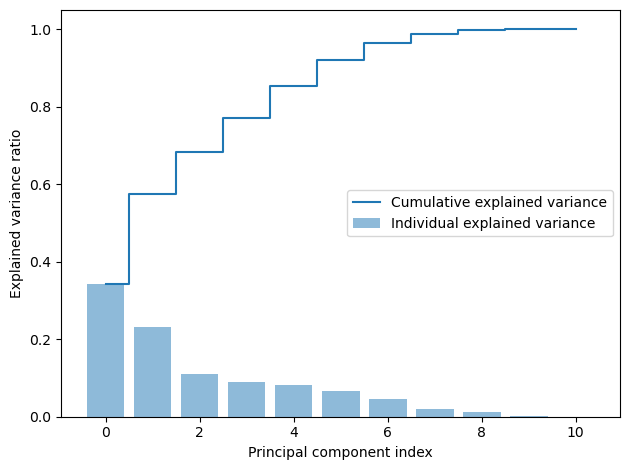

In [111]:
pca = PCA()
# Determine transformed features
X_train_pca = pca.fit_transform(Xstd)
# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Score plot

In [112]:
import plotly.express as px
colors = {'g':'red', 'ml':'blue'}
fig = px.scatter(df, x=X_train_pca[:,0], y=X_train_pca[:,1], color='gOrml', color_discrete_map=colors)
fig.update_layout(width=1600, height=800)
for i in range(141):
    txt=MenuCat[i,2]
    fig.add_annotation(x=X_train_pca[i,0], y=X_train_pca[i,1], text=txt)
fig.show()

Not really happy with the colors of the Menu Category. Can someone help in brightening the colors so that they are more visible

In [131]:
import plotly.express as px
import matplotlib as matplotlib
#colors = {'g':'red', 'ml':'blue'}

colors = dict(zip(df['Menu Category'].unique(),
                  (f'{c}' for c in matplotlib.colors.cnames.values())))


fig = px.scatter(df, x=X_train_pca[:,0], y=X_train_pca[:,1], color='Menu Category', color_discrete_map=colors)
fig.update_layout(width=1600, height=800)
for i in range(141):
    txt=MenuCat[i,1]
    fig.add_annotation(x=X_train_pca[i,0], y=X_train_pca[i,1], text=txt)
fig.show()

In [124]:
colors

{'Regular Menu': '#F0F8FF',
 'Breakfast Menu': '#FAEBD7',
 'McCafe Menu': '#00FFFF',
 'Desserts Menu': '#7FFFD4',
 'Gourmet Menu': '#F0FFFF',
 'Beverages Menu': '#F5F5DC',
 'Condiments Menu': '#FFE4C4'}

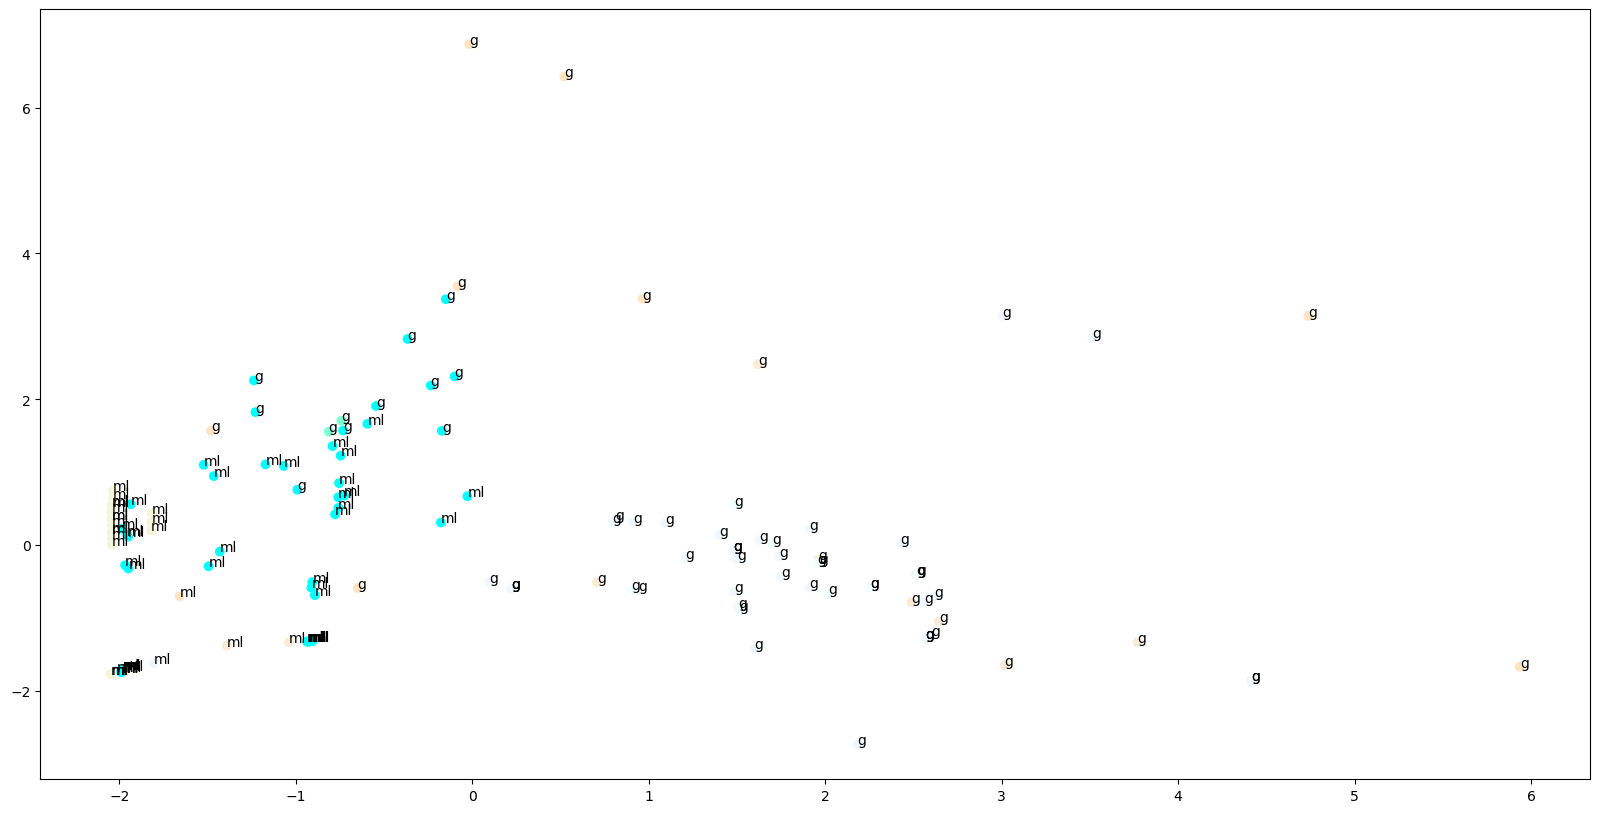

In [134]:
#colors = {'g':'red', 'ml':'blue'}
colors = dict(zip(df['Menu Category'].unique(),
                  (f'{c}' for c in matplotlib.colors.cnames.values())))
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(X_train_pca[:,0],X_train_pca[:,1],c=df['Menu Category'].map(colors))
for i in range(141):
    txt=MenuCat[i,2]
    ax.annotate(txt, (z[i], y[i]))


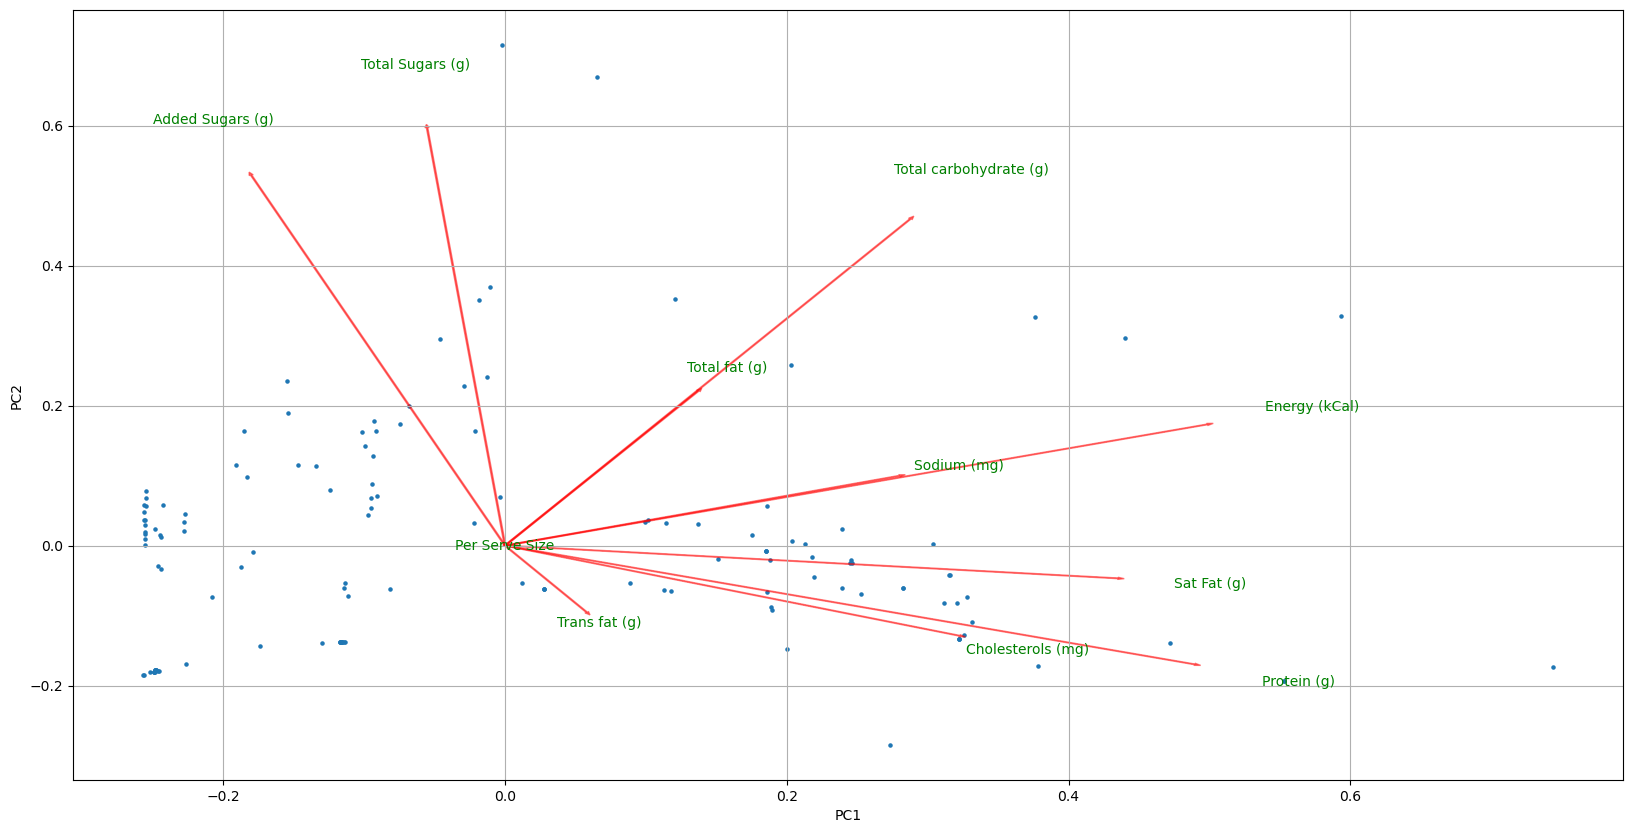

In [141]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(20,10))
myplot(X_train_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(dataX.columns.values))
plt.show()

In [ ]:
pca.c